In [2]:
import pandas as pd
data = pd.read_csv("Cotas.csv")

data.head()

,NU_ANO_CENSO,NO_REGIAO_IES,TP_REDE,NO_CURSO,CO_CURSO,NO_CINE_AREA_GERAL,Unnamed: 6,TP_GRAU_ACADEMICO,QT_VG_TOTAL,QT_INSCRITO_TOTAL,...,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199
0,2022,Centro-Oeste,1,Abi - Artes Cênicas,5001035,Programas básicos,NaN,0,57,147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,Centro-Oeste,1,Abi - Ciências Sociais,5001037,Programas básicos,NaN,0,288,514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,Nordeste,1,Abi - Design,5001039,Programas básicos,NaN,0,40,585,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,Norte,1,Abi - Engenharia,5000587,Programas básicos,NaN,0,595,1577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,Nordeste,1,Abi - Filosofia,5001040,Programas básicos,NaN,0,132,167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Remover colunas completamente vazias e aquelas sem nome relevante
data_cleaned = data.dropna(axis=1, how='all')
data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.str.contains('^Unnamed')]

data_cleaned.head()

,NU_ANO_CENSO,NO_REGIAO_IES,TP_REDE,NO_CURSO,CO_CURSO,NO_CINE_AREA_GERAL,TP_GRAU_ACADEMICO,QT_VG_TOTAL,QT_INSCRITO_TOTAL,QT_ING,...,QT_MAT_RVREDEPUBLICA,QT_MAT_RVETNICO,QT_CONC_RESERVA_VAGA,QT_CONC_RVREDEPUBLICA,QT_CONC_RVETNICO,QT_ING_PROCESCPUBLICA,QT_ING_PROCESCPRIVADA,QT_MAT_PROCESCPUBLICA,QT_MAT_PROCESCPRIVADA,QT_CONC_PROCESCPUBLICA
0,2022,Centro-Oeste,1,Abi - Artes Cênicas,5001035,Programas básicos,0,57,147,26,...,7,4,0,0,0,24,2,22,2,0
1,2022,Centro-Oeste,1,Abi - Ciências Sociais,5001037,Programas básicos,0,288,514,223,...,43,28,0,0,0,186,37,178,36,0
2,2022,Nordeste,1,Abi - Design,5001039,Programas básicos,0,40,585,0,...,0,0,0,0,0,0,0,0,0,0
3,2022,Norte,1,Abi - Engenharia,5000587,Programas básicos,0,595,1577,482,...,179,99,0,0,0,460,22,480,40,0
4,2022,Nordeste,1,Abi - Filosofia,5001040,Programas básicos,0,132,167,53,...,7,7,0,0,0,51,2,49,2,0


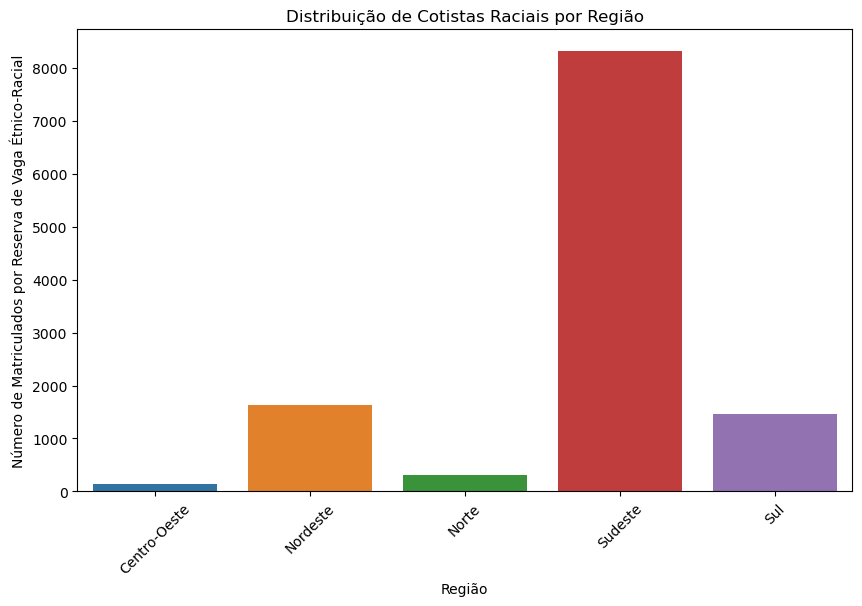

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

cotistas_region = data_cleaned.groupby('NO_REGIAO_IES')['QT_MAT_RVETNICO'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='NO_REGIAO_IES', y='QT_MAT_RVETNICO', data=cotistas_region)
plt.title('Distribuição de Cotistas Raciais por Região')
plt.xlabel('Região')
plt.ylabel('Número de Matriculados por Reserva de Vaga Étnico-Racial')
plt.xticks(rotation=45)
plt.show()

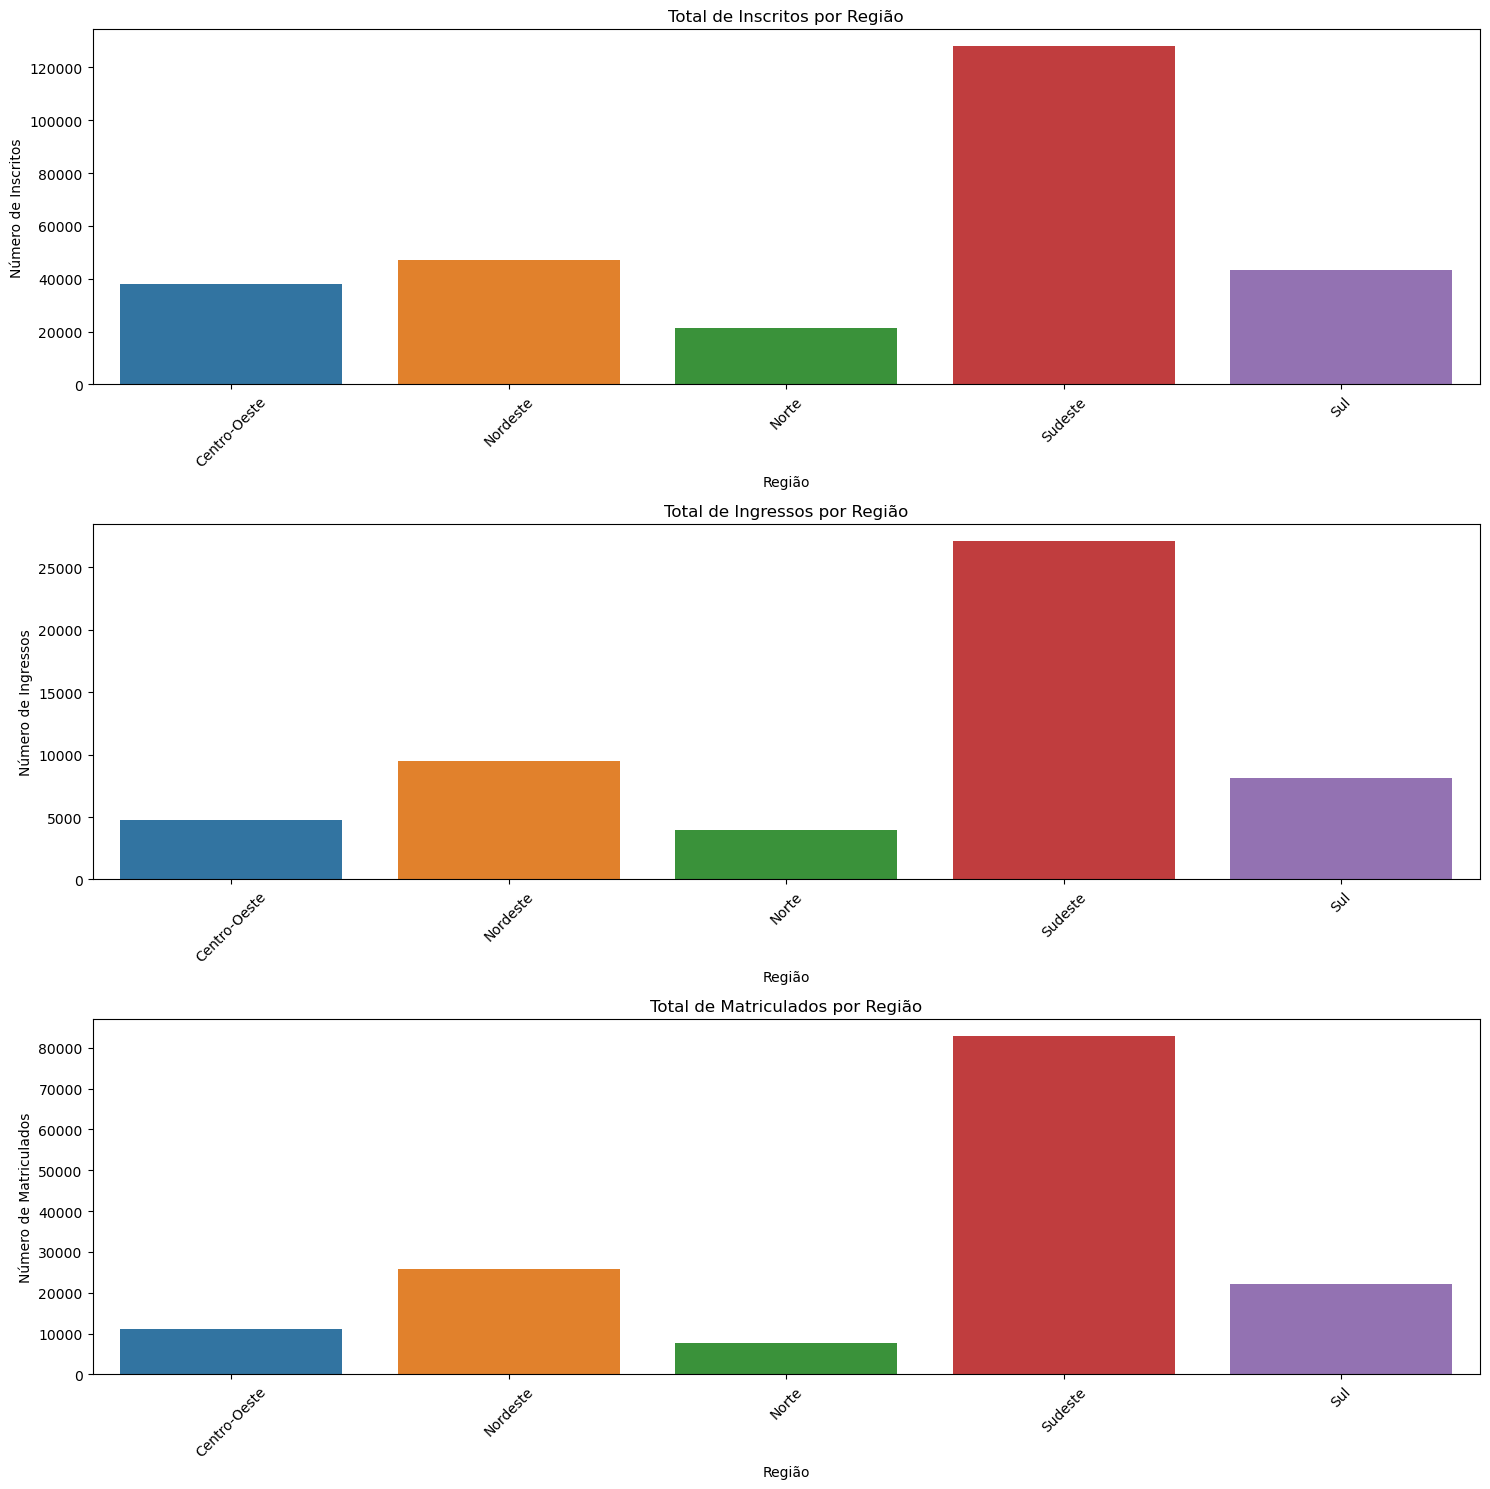

In [16]:
indicators_region = data_cleaned.groupby('NO_REGIAO_IES')[['QT_INSCRITO_TOTAL', 'QT_ING', 'QT_MAT']].sum().reset_index()

plt.figure(figsize=(15, 15))

# Inscritos
plt.subplot(3, 1, 1)
sns.barplot(x='NO_REGIAO_IES', y='QT_INSCRITO_TOTAL', data=indicators_region)
plt.title('Total de Inscritos por Região')
plt.xlabel('Região')
plt.ylabel('Número de Inscritos')
plt.xticks(rotation=45)

# Ingressos
plt.subplot(3, 1, 2)
sns.barplot(x='NO_REGIAO_IES', y='QT_ING', data=indicators_region)
plt.title('Total de Ingressos por Região')
plt.xlabel('Região')
plt.ylabel('Número de Ingressos')
plt.xticks(rotation=45)

# Matriculados
plt.subplot(3, 1, 3)
sns.barplot(x='NO_REGIAO_IES', y='QT_MAT', data=indicators_region)
plt.title('Total de Matriculados por Região')
plt.xlabel('Região')
plt.ylabel('Número de Matriculados')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


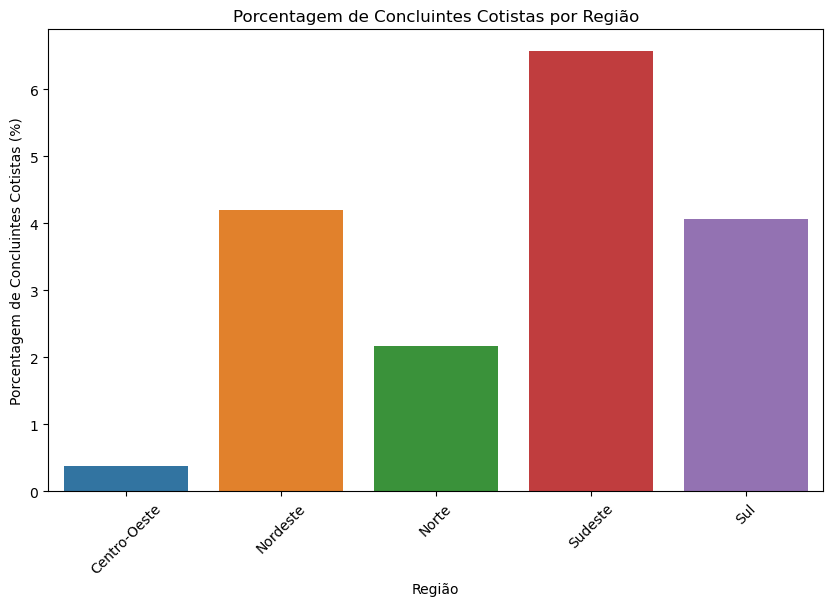

In [18]:
# Agrupar os dados por região e somar os concluintes (cotistas e total)
conclusion_region = data_cleaned.groupby('NO_REGIAO_IES')[['QT_CONC_RVETNICO', 'QT_CONC']].sum().reset_index()

# Calcular a porcentagem de concluintes cotistas
conclusion_region['PCT_CONC_COTISTAS'] = (conclusion_region['QT_CONC_RVETNICO'] / conclusion_region['QT_CONC']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='NO_REGIAO_IES', y='PCT_CONC_COTISTAS', data=conclusion_region)
plt.title('Porcentagem de Concluintes Cotistas por Região')
plt.xlabel('Região')
plt.ylabel('Porcentagem de Concluintes Cotistas (%)')
plt.xticks(rotation=45)
plt.show()

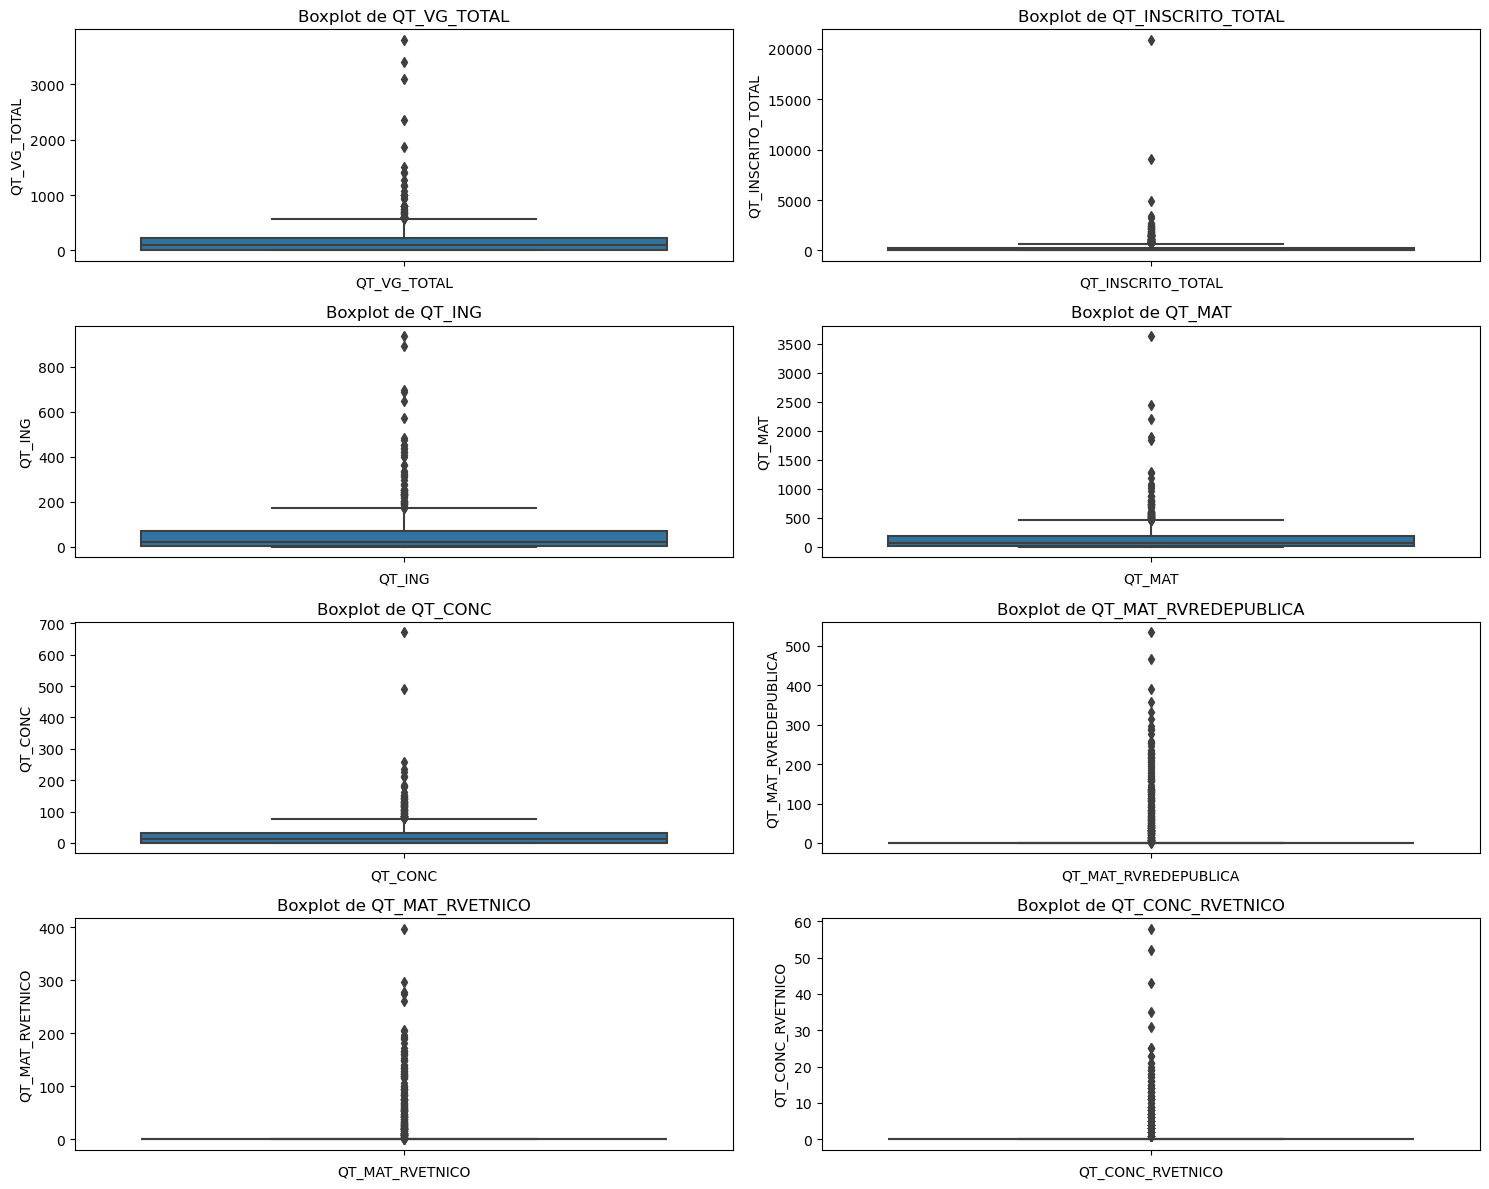

In [20]:
# Listar variáveis para análise de outliers
variables = ['QT_VG_TOTAL', 'QT_INSCRITO_TOTAL', 'QT_ING', 'QT_MAT', 'QT_CONC', 'QT_MAT_RVREDEPUBLICA', 'QT_MAT_RVETNICO', 'QT_CONC_RVETNICO']

plt.figure(figsize=(15, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(y=data_cleaned[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

In [22]:
# Calcular a correlação entre total de inscritos e total de vagas
correlation_inscritos_vagas = data_cleaned['QT_INSCRITO_TOTAL'].corr(data_cleaned['QT_VG_TOTAL'])

# Calcular a correlação entre total de matriculados e total de concluintes
correlation_matriculados_concluintes = data_cleaned['QT_MAT'].corr(data_cleaned['QT_CONC'])

# Calcular a correlação entre matriculados por reserva de vaga étnico-racial e total de concluintes
correlation_rvetnico_concluintes = data_cleaned['QT_MAT_RVETNICO'].corr(data_cleaned['QT_CONC'])

# Calcular a correlação entre matriculados por reserva de vaga de rede pública e total de concluintes
correlation_rvredepublica_concluintes = data_cleaned['QT_MAT_RVREDEPUBLICA'].corr(data_cleaned['QT_CONC'])

# Exibir as correlações
correlation_inscritos_vagas, correlation_matriculados_concluintes, correlation_rvetnico_concluintes, correlation_rvredepublica_concluintes


(0.3119000491089606,
 0.8889326196270578,
 0.21791623538966023,
 0.2235502867553316)

## Correlação entre Total de Inscritos e Total de Vagas:
Correlação: 0.3119
- Isso sugere uma correlação positiva moderada entre o número de inscritos e o número de vagas oferecidas.

## Correlação entre Total de Matriculados e Total de Concluintes:
Correlação: 0.8889
- Isso indica uma forte correlação positiva entre o número de matriculados e o número de concluintes, sugerindo que a maioria dos matriculados tende a concluir o curso.
  
## Correlação entre Matriculados por Reserva de Vaga Étnico-Racial e Total de Concluintes:
Correlação: 0.2179
- Isso sugere uma correlação positiva fraca entre o número de matriculados por reserva de vaga étnico-racial e o número de concluintes.
  
## Correlação entre Matriculados por Reserva de Vaga de Rede Pública e Total de Concluintes:
Correlação: 0.2236
- Isso sugere uma correlação positiva fraca entre o número de matriculados por reserva de vaga de rede pública e o número de concluintes.

In [26]:
region_summary = data_cleaned.groupby('NO_REGIAO_IES')[['QT_MAT_RVETNICO', 'QT_INSCRITO_TOTAL', 'QT_ING', 'QT_MAT']].sum().reset_index()
region_summary.columns = ['Região', 'Matriculados Cotistas', 'Total de Inscritos', 'Total de Ingressos', 'Total de Matriculados']
region_summary

,Região,Matriculados Cotistas,Total de Inscritos,Total de Ingressos,Total de Matriculados
0,Centro-Oeste,138,38076,4783,11154
1,Nordeste,1629,46931,9517,25696
2,Norte,310,21261,3978,7774
3,Sudeste,8309,128047,27104,82797
4,Sul,1462,43374,8109,22065


In [28]:
# Criar dataframe de indicadores econômicos
economy_data = {
    'Região': ['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'],
    'PIB (em bilhões)': [640, 700, 260, 2100, 900],
    'Renda Média (R$)': [2500, 1800, 1700, 3000, 2800],
    'Taxa de Desemprego (%)': [8.2, 15.0, 11.0, 9.0, 7.5]
}
economy_df = pd.DataFrame(economy_data)
combined_df = pd.merge(region_summary, economy_df, on='Região')

correlation_cotistas_pib = combined_df['Matriculados Cotistas'].corr(combined_df['PIB (em bilhões)'])
correlation_cotistas_renda = combined_df['Matriculados Cotistas'].corr(combined_df['Renda Média (R$)'])
correlation_cotistas_desemprego = combined_df['Matriculados Cotistas'].corr(combined_df['Taxa de Desemprego (%)'])

correlation_cotistas_pib, correlation_cotistas_renda, correlation_cotistas_desemprego

(0.9686885071323992, 0.613064286960833, -0.13256158355585296)

## Correlação entre Matriculados Cotistas e PIB (em bilhões):
Correlação: 0.9687
- Isso indica uma forte correlação positiva entre a quantidade de cotistas e o PIB da região. Regiões com um PIB maior tendem a ter um maior número de cotistas.

## Correlação entre Matriculados Cotistas e Renda Média (R$):
Correlação: Correlação: 0.6131
- Isso sugere uma correlação positiva moderada entre a quantidade de cotistas e a renda média da região.
  
## Correlação entre Matriculados Cotistas e Taxa de Desemprego (%):
Correlação: -0.1326
- Isso indica uma correlação negativa fraca entre a quantidade de cotistas e a taxa de desemprego. No entanto, essa correlação é bastante fraca, sugerindo que a taxa de desemprego não está fortemente relacionada com a quantidade de cotistas.

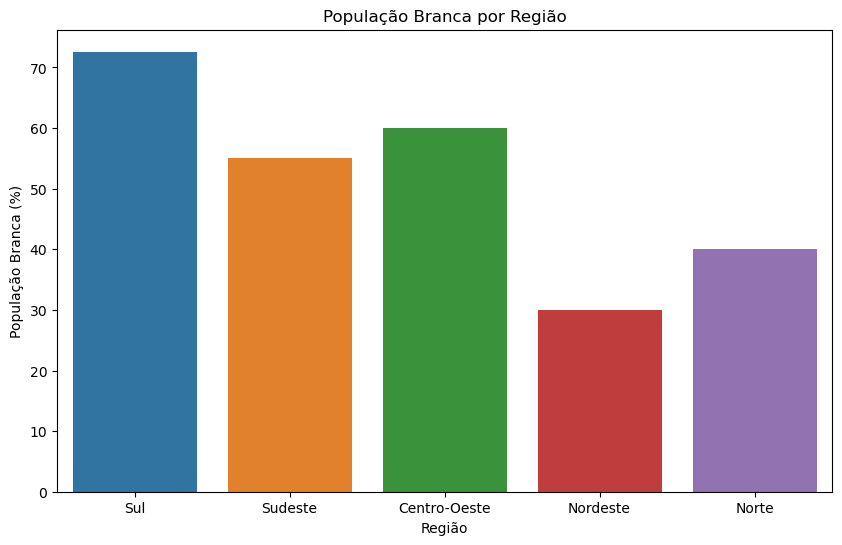

In [33]:
import matplotlib.pyplot as plt

pop_branca = {
    'Região': ['Sul', 'Sudeste', 'Centro-Oeste', 'Nordeste', 'Norte'],
    'População Branca (%)': [72.6, 55.0, 60.0, 30.0, 40.0]
}

pop_branca_df = pd.DataFrame(pop_branca)

# Criar gráfico de barras para população branca por região
plt.figure(figsize=(10, 6))
sns.barplot(x='Região', y='População Branca (%)', data=pop_branca_df)
plt.title('População Branca por Região')
plt.xlabel('Região')
plt.ylabel('População Branca (%)')
plt.show()

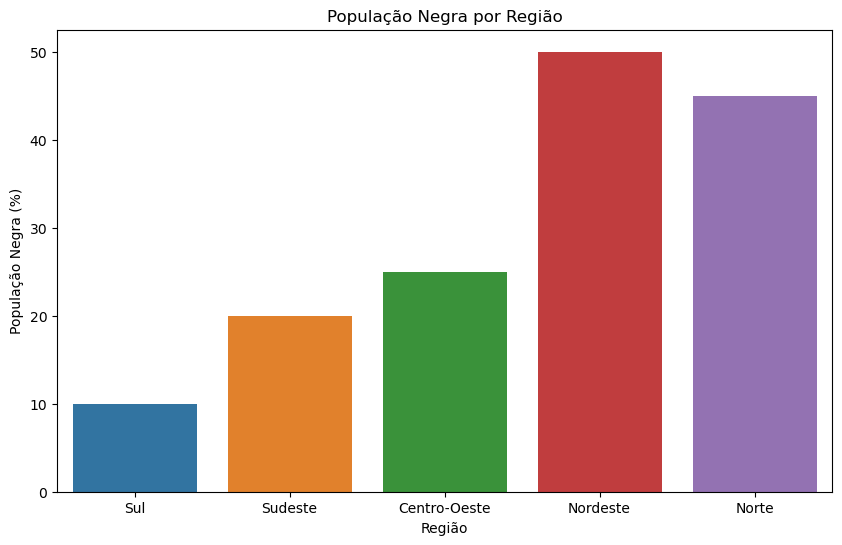

In [35]:
pop_negra = {
    'Região': ['Sul', 'Sudeste', 'Centro-Oeste', 'Nordeste', 'Norte'],
    'População Negra (%)': [10.0, 20.0, 25.0, 50.0, 45.0]
}

pop_negra_df = pd.DataFrame(pop_negra)

# Criar gráfico de barras para população negra por região
plt.figure(figsize=(10, 6))
sns.barplot(x='Região', y='População Negra (%)', data=pop_negra_df)
plt.title('População Negra por Região')
plt.xlabel('Região')
plt.ylabel('População Negra (%)')
plt.show()

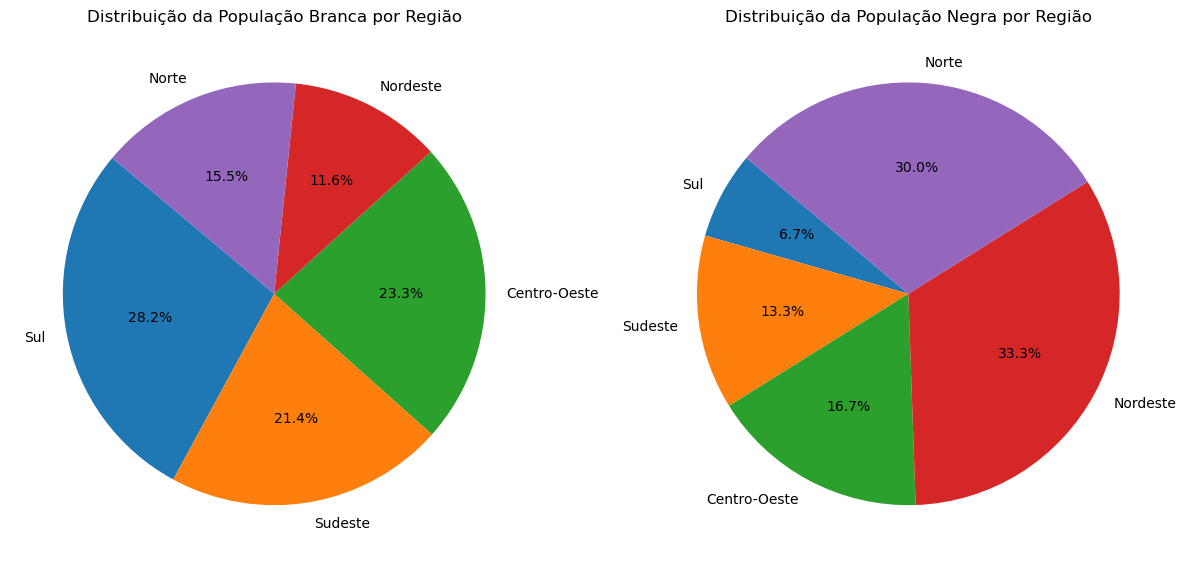

In [43]:
populacao_regioes = {
    'Região': ['Sul', 'Sudeste', 'Centro-Oeste', 'Nordeste', 'Norte'],
    'Branca (%)': [72.6, 55.0, 60.0, 30.0, 40.0],
    'Negra (%)': [10.0, 20.0, 25.0, 50.0, 45.0]
}

populacao_regioes_df = pd.DataFrame(populacao_regioes)

# Criar gráficos de pizza para população branca e negra por região
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Gráfico de pizza para população branca
axs[0].pie(populacao_regioes_df['Branca (%)'], labels=populacao_regioes_df['Região'], autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribuição da População Branca por Região')

# Gráfico de pizza para população negra
axs[1].pie(populacao_regioes_df['Negra (%)'], labels=populacao_regioes_df['Região'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribuição da População Negra por Região')

plt.show()